# <center> Project: **Customer Intelligence** department in a Bank company: real world examples of a **Data Scientist** in a Bank company. Part I: customer segmentation and loan/credit prediction


# Project goals:
In this project, we are going to develop and apply different unsupervised and supervised Machine Learning techniques we have learnt during this ML course. This project has several objectives in order to introduce the student in real world use cases as a future Data Scientist.

We work in the Customer Intelligence area of a bank company as a Data Scientist. In the financial sector (but also in general in any company) fraud detection and customer credit score are key in order to determine the risk before granting a loan. Complementary, Bank companies uses to qualify the asset (e.g. a house, a vehicle, etc...) that the customer pretends to buy in order to evaluate the risk that the credit cannot be payed back.

Therefore, as a Customer Intelligence team member, you will be responsible for designing, developing and analyzing the **intelligence** to lead the business of our Bank company.


In particular:

- You will apply unsupervised learning to cluster a customer base in order to "understand" the main patters and characteritics of the **groups** or **segments**. Customer segmentation is a very useful tool and crucial in any **data-driven** company.

- You will also apply supervised learning to develop a model able to classify customers between high and low risk of default in case of receiving a credit or loan.

- You will develop a regression model in order to determine an objective price for second hand vehicles, due to they are one of main reasons because our customers request a credit

- As a bonus track we will complement the previous model as a classification stage that split between trucks (usually for professional customers) and cars (usually for particular customers) based on images.


To solve all these questions we will follow a common framework or way-of-working in Machine Learning projects: the **Machine Learning Operations (MLOps) life-cycle**. This framework is a common procedure in order to guarantee all stages in end-to-end Machine Learning project are covered: from the business problem understanding until to operation and maintenance of a solution.

<img src='https://drive.google.com/uc?id=1EG0doe2ryshTGqoD5IsAJqZtOppDHNVT'>



source: https://towardsdatascience.com/a-beginner-friendly-introduction-to-mlops-95282f25325c#aabc

### Due date: up to 18 june.
### Submission procedure: via Moodle.

*******

# **Part 0: Introduction to MLOPS**

In the past, one of the main reason because the Machine Learning project failed was due to the lack of a robust and end-to-end procedure that covers all key stages of a project: from the design to maintenance and evolution of the solution.
Today we can find several definitions of MLOps but some of the most common are:

(1) "MLOps is a paradigm, including aspects like best practices, sets of concepts, as well as a development culture when it comes to the end-to-end conceptualization, implementation, monitoring, deployment, and scalability of machine learning products" [Kreuzberger, D., Kühl, N., &Hirschl, S. Machine learning operations (mlops): Overview, definition, and architecture, 2022. doi:10.48550.arXiv preprint arXiv.2205.02302]

(2) "We can use the definition of Machine Learning Engineering (MLE), where MLE is the use of scientific principle, tools, and techniques of machine learning and traditional software engineering to design and build complex computing systems. MLE encompasses all stages from data collection, to model building, to make the model available for use by the product ot the consumers." (by A. Burkov) [https://ml-ops.org/content/motivation#mlops-definition]

MLOps life-cycle consists mainly in three steps:
- **Design process**, that involves the definition of the use case problem and the main requirements in terms of production and maintenance.
- **Model development**, that includes all the data and model engineering
- **Operations process**, includes model deployment, monitoring and maintenance.

This MLOps life-cycle follows a workflow or framework that specifies the concrete activities that take part of it:

(1) **Business problem**: In any ML project is crucial to define the business problem or use case. A wrong definition will imply a failure in any of the next stages. To address this part of the workflow there are different several tools and ML canvas that facilitates the high-level description and main aspects of the system. An example of ML canvas could be:


<img src='https://drive.google.com/uc?id=1HzSlvc4w4wYXSJp1-OPy2mBt0LDjHpYV'>

(2) **Data engineering or Data wrangling**: It consists on all data process ,management: from data gathering or ingestion until data understanding and preparation. This stage uses to require more than 50% of the human resources and it is crucial for the modelling stage.
- (a) data ingestion or gathering: implies to access IT systems to get the data sources and creating a dictionary to describe the variables that are part of these data sources.
- (b) **Exploratory Data Analysis**: implies a statistics analysis of the data including the usage of several visualization techniques as correlation matrix, boxplots, outliers identification, etc.... Data understanding will facilitate the identification of the most relevant data to our purpose.
- (c) **Data cleaning and preparation**: removing outliers, null management, categorical variables encoding,... are examples of main activities included in this sub-stage.

(3) **Modelling or ML Model Engineering**: it includes model training, evaluation, testing and insights generation. As an output of this stage of the workflow, the ML model is packaged as a final step before been deployed in our ML infrastructure.
- (a) Model training implies the selection of the technique or combination of techniques that suits better for the use case. Feature engineering is also included.
- (b) Model evaluation and test: allows to determine the perfomance of the trained model and decide if it is good enough to our use case.
- (c) insight generation: Once the model is trained and validated its performance, in this sub-stage we go back to our initial stage (i.e. business problem) to ensure that it meets the business objectives defined as use case.
- (d) Model packing: Once the built ML has been validated and tested, the model is ready to be exported to the infrastructure responsible for executing, monitoring and maintenance.

(4) **Code engineering**: in this final stage of the MLOps workflow the model is deployed into production where performance monitoring and logging is done. The subtasks are:
- (a) Model serving: it refers to how the model is integration of the final application or software. This integration could be done via API, on-demand serving, pre-calculated, etc.... The deployment of the model could be via a docker container in cloud or local or as a serveless function.
- (b) Model monitoring and logging: it refers to the periodic observation of the ML performance and comparision with original trained one. In case of large deviation, this sub-stage will generate an alarm or warning previous to the returning to previous stages to re-train the model. The performance of the model are saved in a log record to be analyzed.


In this project, we will focus on the **business problem**, **data engineering** and **data modelling** stages of the MLOps workflow:

<img src='https://drive.google.com/uc?id=1HgG4ROiY5eqIVlNinaa21HoshLQZZWIq'>




*******

# **Part I: Customer segmentation and load prediction**
In this first part of the project, we will apply unsupervised learning to cluster the Bank's customer base. We will learn how to apply the clustering using Python and how they are used to generate insights about our customer base, i.e. identify the main types or **sterotypes** of customers and their differences. Besides, we will learn to calculate the optimal K value and measure the quality of the clustering.

## Step 0. Understanding the problem: customers' stereotypes

As a data scientist in the **Customer Intelligence** department of a Bank company, we are responsible for identified the main **patterns** or **stereotypes** of our customer base. These **stereotypes** can be used for several purposes: from marketing campaigns to bank operations as acceptance or deney of credits or loans.


To develop this customer segmenation, we are going **to apply unsupervised learning** and more specifically the two of the most important clustering techniques: K-means and Mixture of Gaussians (MoG).**


# Step 1: Data gathering


In this practice we are using a new dataset named `loan_prediction.csv`. This file contains information of **613 of our bank's consumers** that were accepted or denied to receive a loan in the past. In particular, the detailed information for each customer is:

- *Loan_ID*: It's an integer that identifies any cuatomer.
- *Gender*: Male or female
- *Married*: Yes or No
- *Dependents*: Number of people that depends on the Loan_ID
- *Education*: Level of education (graduate or not-graduate) of the Loan_ID
- *Self_Employed*: Yes or No
- *ApplicantIncome*: Monthly income (€) of the Loan_ID
- *CoapplicantIncome*: Monthly income (€) of the Loan_ID's coapplicant in case of existing
- *LoanAmount*: Monthly quantity (€) of the loan
- *Loan_Amount_Term*: Duration of the loan
- *Credit_History*: It takes value 1 if the loan_id requested a loan in the past and 0 if he/she didn't
- *Property_Area*: Type of location of the property: Urban, Semiurban or Rural
- *Loan_Status*: Yes or No and it refers that the loan request was accepted or denied.

# Step 2: Data understanding and preparation

Once we know the problem to solve, the next stage is to have a clear understanding of the data we have extracted and to prepare it before modelling. In particular, we will:
- List and verify the type of each variable (object, float, int...). Identify variables with nulls. Measure the memory usage
- Eliminate rows with nulls in order to have a dataset 100% fulfilled
- Aggregate rows with monthly expense per customers in order to have just 1 sample per customers
- Exploratory Data Analysis to understand main statistics (mean, standard deviation, min&max values and 25%-50%-75% quartiles) and distribution of the most relevant variables or features as data usage, voice usage, monthly expense and number of lines
- Plot several graphs in order to identify how variables are related between them. In particular:
- correlation matrix
- 2D and 3D scatter plots between data usage, voice usage and monthly expense

Once this part, also known as **data wrangling** of the Project is done, we should achieve a deep knowledge about the data. Besides, the dataset will have been processed to be ready to apply the clustering algorithms to solve the business problem.

Let's import the main Python libraries required in our project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as animation


#%matplotlib notebook
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import pyplot
from mpl_toolkits import mplot3d
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from graphviz import Source
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/Project_students"

/content/drive/My Drive/Project_students


**[EX0]** Open the csv with separator "," and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [ ]:
customer_dt = pd.read_csv("loan_prediction.csv", sep=",")
customer_dt.head()

,Index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


[**EX1**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which is the variable with more nulls? And with no nulls?

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

In [ ]:
#Accedemos a la información general del Dataset
customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              614 non-null    int64  
 1   Loan_ID            614 non-null    object 
 2   Gender             601 non-null    object 
 3   Married            611 non-null    object 
 4   Dependents         599 non-null    object 
 5   Education          614 non-null    object 
 6   Self_Employed      582 non-null    object 
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         592 non-null    float64
 10  Loan_Amount_Term   600 non-null    float64
 11  Credit_History     564 non-null    float64
 12  Property_Area      614 non-null    object 
 13  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 67.3+ KB


**De esta manera podemos ver el tamaño del Dataset, así como el número de variables no nulas y el tipo de ésta.**

In [ ]:
#Observemos de manera precisa el número de elementos nulos en cada variable
customer_dt.isna().sum()

Index                 0
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Observamos como la variable con mayor número de datos nulos es la de Credit_History con 50, mientras que las que menos tienen son Index, Loan_ID, Education, ApplicantIncome, CoapplicatntIncome,Property_Area y Loan_Status con 0.**

We should guarantee that our dataset for training the cluster has no **nulls** in those variables.

[**EX2**] Eliminate those rows with nulls in any of variables. We will use this new dataset from now for the rest of the project.



In [ ]:
customer_dt.dropna(axis=0, inplace=True)

Let's re-calculate the type of the variables (integer, float, chart...) and the size of the dataset and the file. Your output should look like this:

In [ ]:
customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              480 non-null    int64  
 1   Loan_ID            480 non-null    object 
 2   Gender             480 non-null    object 
 3   Married            480 non-null    object 
 4   Dependents         480 non-null    object 
 5   Education          480 non-null    object 
 6   Self_Employed      480 non-null    object 
 7   ApplicantIncome    480 non-null    int64  
 8   CoapplicantIncome  480 non-null    float64
 9   LoanAmount         480 non-null    float64
 10  Loan_Amount_Term   480 non-null    float64
 11  Credit_History     480 non-null    float64
 12  Property_Area      480 non-null    object 
 13  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 56.2+ KB


In Machine Learning, it is key to understand the nature of the data before training. For numeric variables, it is useful to calculate the distribution and main statistics.

[**EX3**] Calculate the main statistics (max, min, mean, median and standard deviation) of numerical variables. Plot a histogram for each of these variables

Tip: use [Seaborn library](https://seaborn.pydata.org/) with `kde=True` to create a histogram. You also can use **dataframe_column.histplot(bins=number_of_bins)**

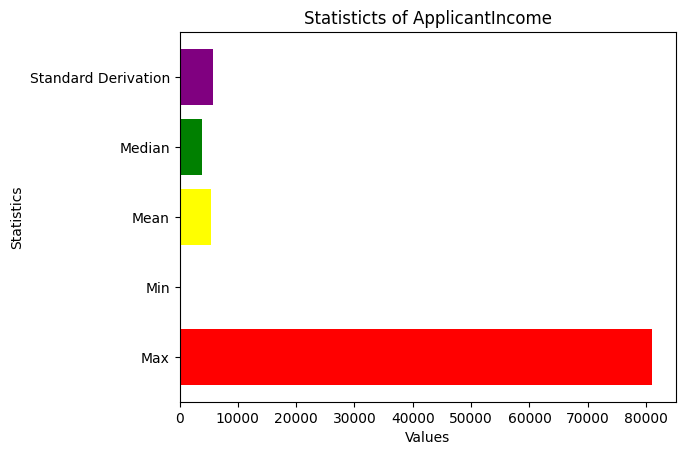

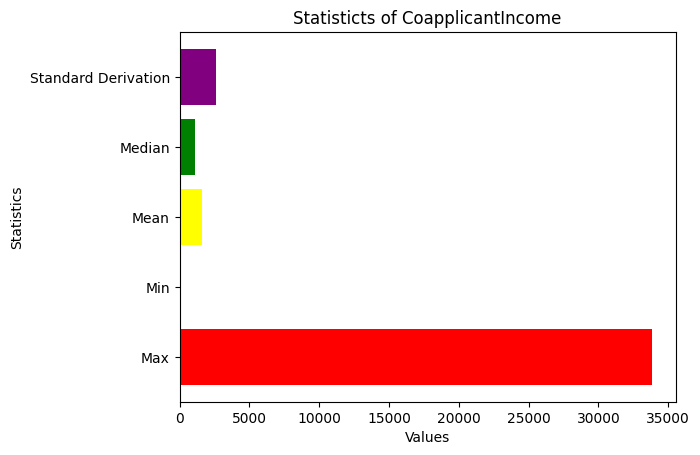

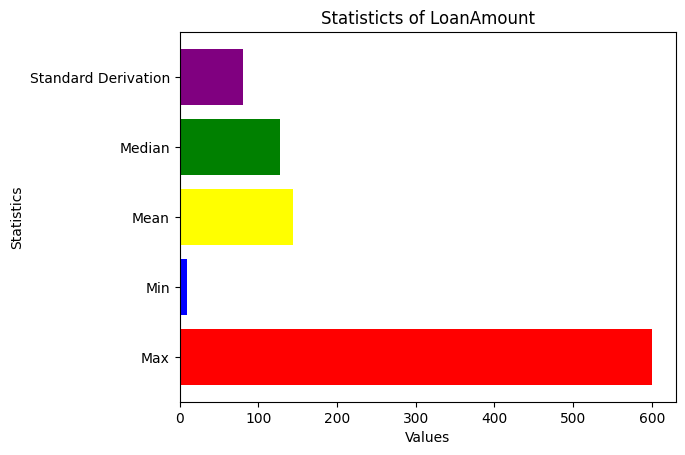

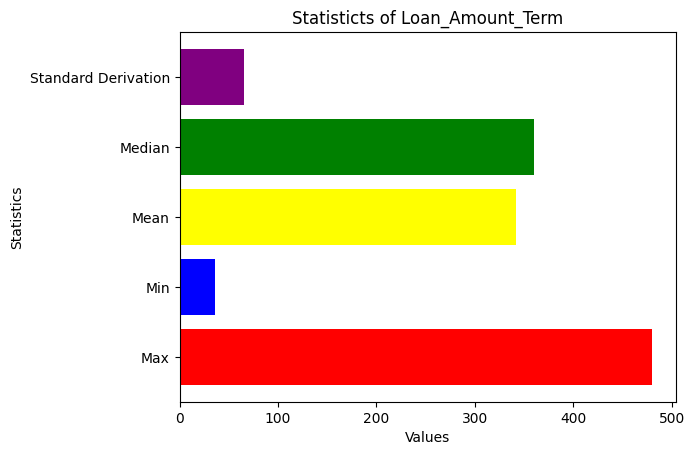

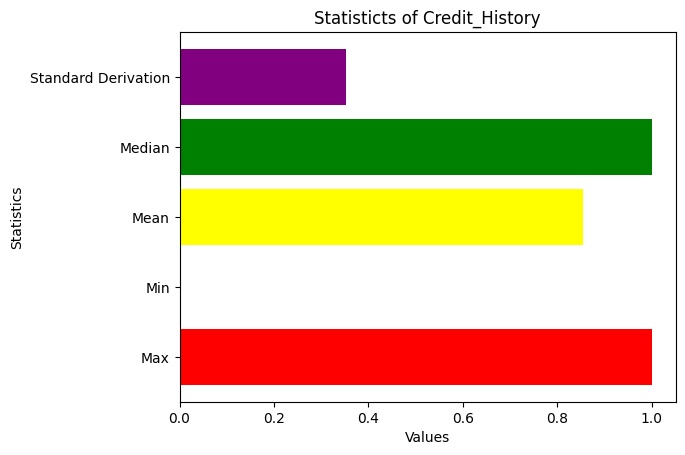

In [ ]:
# Restringimos el Dataset a variables numéricas
df_num = customer_dt[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']]

# Describimos las estadísticas de nuestro Dataset
statistics = df_num.describe()
max_values = statistics.loc['max']
min_values = statistics.loc['min']
mean_values = statistics.loc['mean']
median_values = df_num.median()
std_values = statistics.loc['std']


# Ploteamos las estadísticas de cada variable
for column in df_num.columns:
    fig, ax = plt.subplots()
    ax.barh(['Max', 'Min', 'Mean', 'Median', 'Standard Derivation'], [max_values[column], min_values[column], mean_values[column], median_values[column], std_values[column]], color=['red', 'blue', 'yellow','green','purple'])
    ax.set_ylabel('Statistics')
    ax.set_xlabel('Values')
    ax.set_title(f'Statisticts of {column}')
    plt.show()

**[EX4]** Create a box plot for the `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`variables. Do you identify any outlier? Justify your answer.


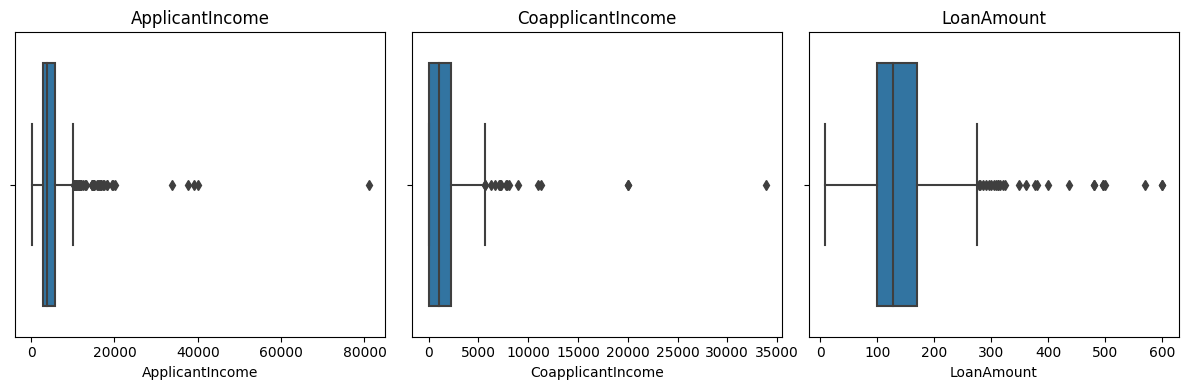

In [ ]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Create box plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

for i, column in enumerate(columns):
    sns.boxplot(x=df_num[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

**Nótese como encontramos valores atípicos en dichas variables, destacando unos valores por encima de la media repsecto a la variable ApplicantIncome rondando los 40000 por un lado y los 80000 por otro, respecto a la variable CoapplicantIncome: valores atípicos rondando los 20000 y los 35000, mientras que respecto a LoanAmount: valores atípicos rondando los 500 y 600.**

Additionaly to understanding each individual variable, it is important to understand how they are related to each other.

**Para entender cómo se relacionan los valores atípicos de estas 3 variables es importante entender que la variable ApplicantIncome se refiere a la renta mensual (€) del préstamo mientras que CoapplicantIncome se refiere a la renta mensual (€) del cosolicitante del préstamo y LoanAmount la cantidad mensual del préstamo. Por tanto, a través de un análisis del boxplot de estas tres variables podemos generalizar que cuantos mayores ingresos del solicitante y/o cosolicitante, la cantidad mensual del préstamo será mayor.**

[**EX5**] Calculate and plot the correlation matrix between customer attributes (i.e. `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term` and `Credit_History`.
- Which are the variables with more and less absolute correlation with respect to the `ApplicantIncome` variable?
- Which are the top 2 variables with highest correlation between them?
-and lowest?

Tip: use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [matplotlib.pyplot.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show this graphically.

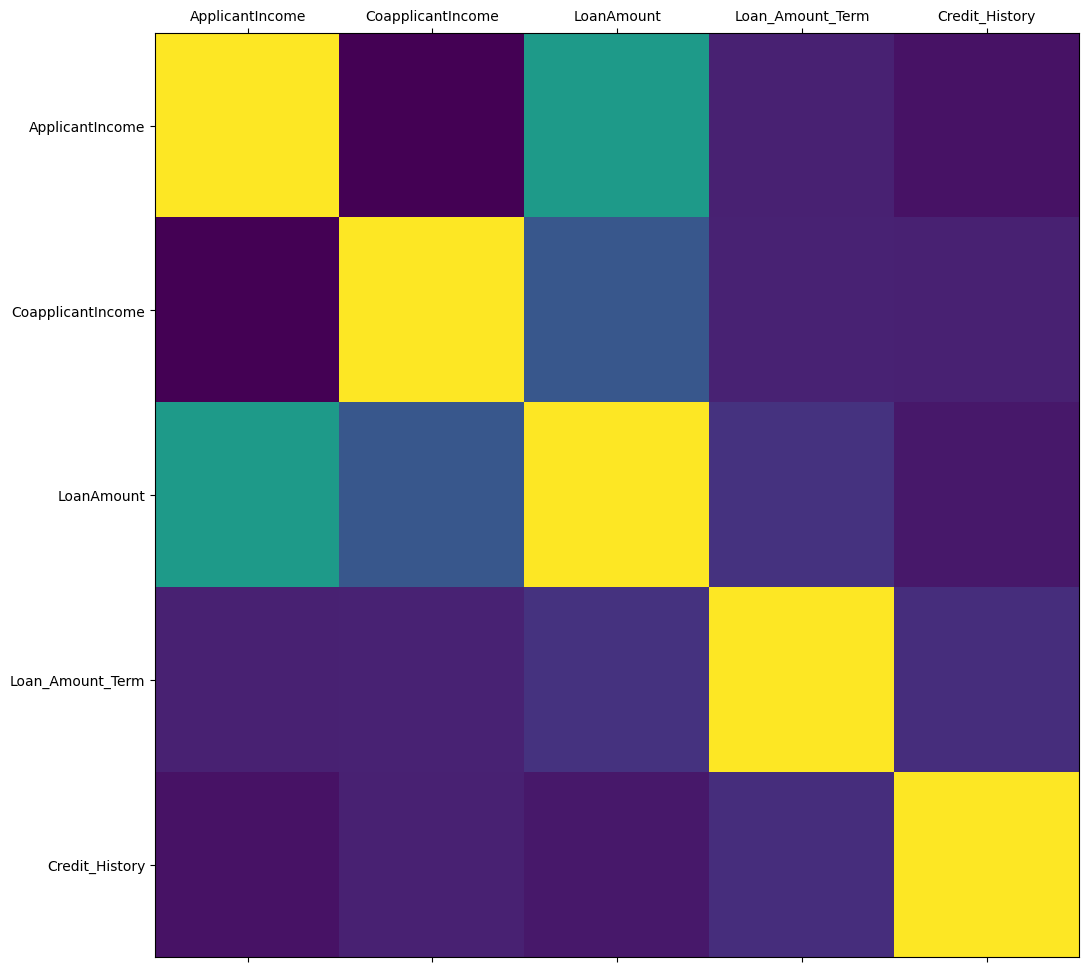

In [ ]:
corr_mat = df_num.corr()    #get correlation matrix of dataset

labels = [c for c in corr_mat.columns]  # get labels list

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.matshow(corr_mat)  # display the matrix

#Set label names
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

**Respecto a la variable ApplicantIncome, la variable con mayor correlación es la de LoanAmount mientras que la que menos correlación absoluta es la de CoapplicantIncome**

**Las dos variables con mayor correlación entre sí serían: ApplicantIncome y LoanAmount. Mientras que las dos variables con menor correlación entre sí serían: CoApplicantIncome y ApplicantIncome**

Another option to analyze the relation 1-to-1 between 2 variables in through scatter plots. Let's simplify the original dataset and create a new `training_dt`dataset with only `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`.

In [ ]:
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
training_dt.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
5,5417,4196.0,267.0


[**EX6**] Visualize a scatter plot with `ApplicantIncome` vs `Loan_Amount` variables. Could you visually identify any cluster? How many?

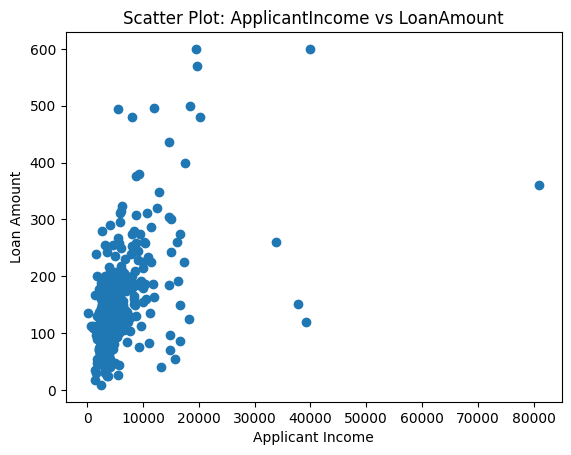

In [ ]:
plt.scatter(training_dt['ApplicantIncome'],training_dt['LoanAmount'])

plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: ApplicantIncome vs LoanAmount')

plt.show()

**Visualmente podemos identificar 5 clusters principales cuyos centros aproximadamente serían: (7000,170), (18000,500), (39000,190), (42000,600) y (80000,380)**

[**EX7**] Visualize a scatter plot with `ApplicantIncome` vs `CoapplicantIncome` variables. Could you visually identify any cluster? How many?

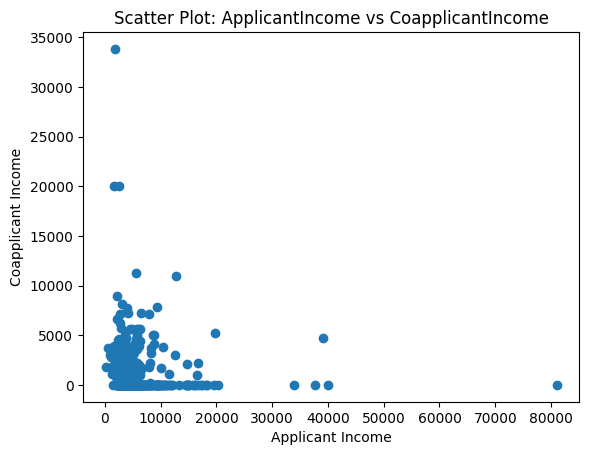

In [ ]:
plt.scatter(training_dt['ApplicantIncome'],training_dt['CoapplicantIncome'])

plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.title('Scatter Plot: ApplicantIncome vs CoapplicantIncome')

plt.show()

****Visualmente podemos identificar 5 clusters principales cuyos centros aproximadamente serían: (7000,2000), (2000,20000), (2000,34000), (38000,2000) y (82000,0)****

[**EX8**] Visualize a scatter plot with `ApplicantIncome` vs `CoapplicantIncome` variables which values are below 20000 and over 0 respectively. Could you visually identify any cluster? How many?

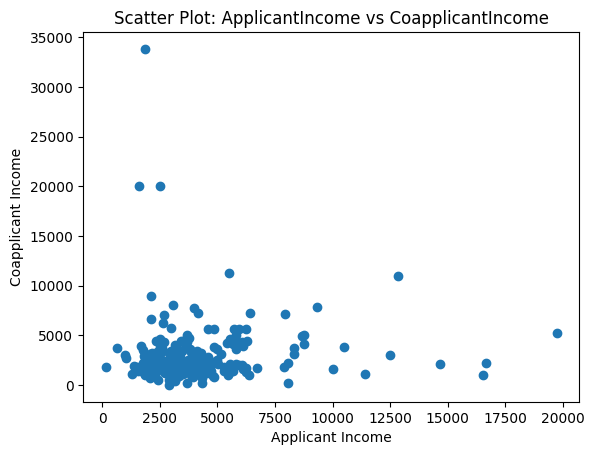

In [ ]:
filtered_data = training_dt[(training_dt['ApplicantIncome']<20000) & (training_dt['CoapplicantIncome']>0)]

plt.scatter(filtered_data['ApplicantIncome'], filtered_data['CoapplicantIncome'])
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.title('Scatter Plot: ApplicantIncome vs CoapplicantIncome')

plt.show()

**Visualmente podemos identificar 4 clusters principales cuyos centros aproximadamente serían: (3200,1000), (2400,20000), (2000,34000) y (16500,1000)**

**[EX9]** Which type of clustering technique will fit better to this dataset? Justify your answer.

**La mejor técnica de clustering será Mixture of Gaussians puesto que la varianza relacionada a cada clase no tiene forma esférica o circular, hecho de vital importancia para la utilización del algoritmno k-means.**

[**EX10**] To improve our understanding of the data, plot a 3D visualization between `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`.
- Could you visually identify any cluster? How many?
- Could you identify a cluster bigger than the others? Describe approximately it in terms of the values of these 3 variables


Tip: use [scatter3d](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create 3D scatter plots.

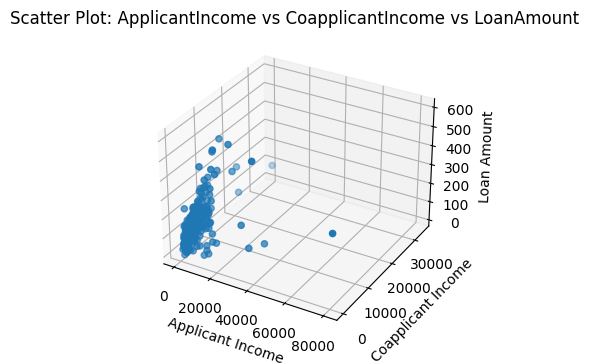

In [ ]:
fig = plt.figure(figsize=(26,4))
ax = fig.add_subplot(111, projection='3d')

#Create 3D scatter plot
ax.scatter(training_dt['ApplicantIncome'],training_dt['CoapplicantIncome'], training_dt['LoanAmount'])

#Set label and title names
ax.set_xlabel('Applicant Income')
ax.set_ylabel('Coapplicant Income')
ax.set_zlabel('Loan Amount')
plt.title('Scatter Plot: ApplicantIncome vs CoapplicantIncome vs LoanAmount')

#Visualize it
plt.show()

[**EX11**] Rotate the plot 2 times to visualize the plot from other perspectives.

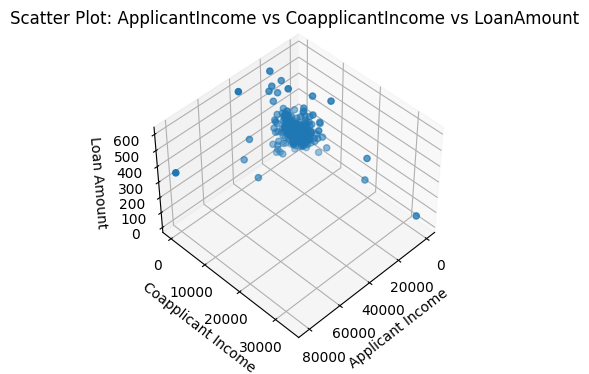

In [ ]:
fig = plt.figure(figsize=(26,4))
ax = fig.add_subplot(111, projection='3d')

#Create 3D scatter plot
ax.scatter(training_dt['ApplicantIncome'],training_dt['CoapplicantIncome'], training_dt['LoanAmount'])
#Rotate the plot
ax.view_init(elev=45, azim=45)

#Set label and title names
ax.set_xlabel('Applicant Income')
ax.set_ylabel('Coapplicant Income')
ax.set_zlabel('Loan Amount')
plt.title('Scatter Plot: ApplicantIncome vs CoapplicantIncome vs LoanAmount')

#Visualize it
plt.show()

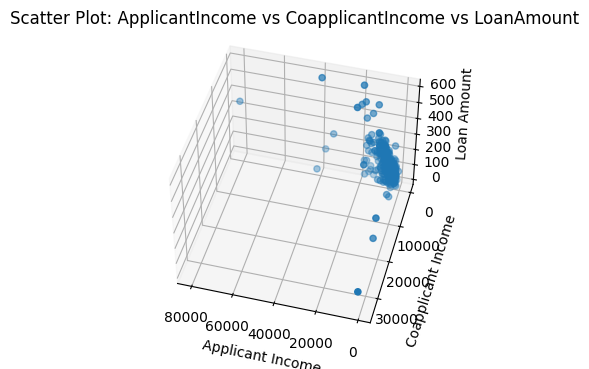

In [ ]:
fig = plt.figure(figsize=(26,4))
ax = fig.add_subplot(111, projection='3d')

#Create 3D scatter plot
ax.scatter(training_dt['ApplicantIncome'],training_dt['CoapplicantIncome'], training_dt['LoanAmount'])
#Rotate the plot
ax.view_init(elev=45, azim=105)

#Set label and title names
ax.set_xlabel('Applicant Income')
ax.set_ylabel('Coapplicant Income')
ax.set_zlabel('Loan Amount')
plt.title('Scatter Plot: ApplicantIncome vs CoapplicantIncome vs LoanAmount')

#Visualize it
plt.show()

**[EX12]** Let's analysis the distribution of some categorical variables as: `gender`, `Marital Status`, `Education`, `Self-Employment` and `Loan_Status`
. Create a bar plot for these 4 variables.

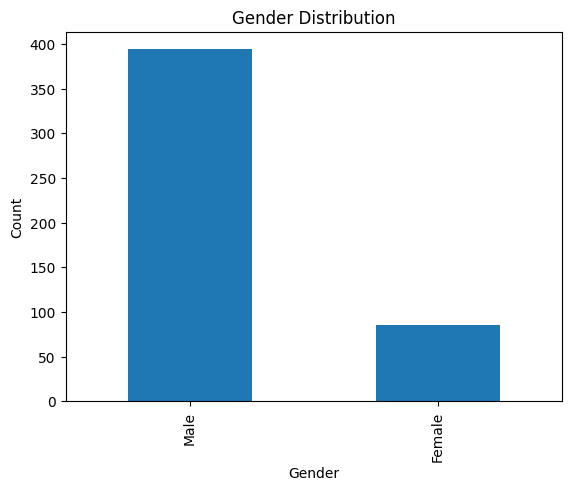

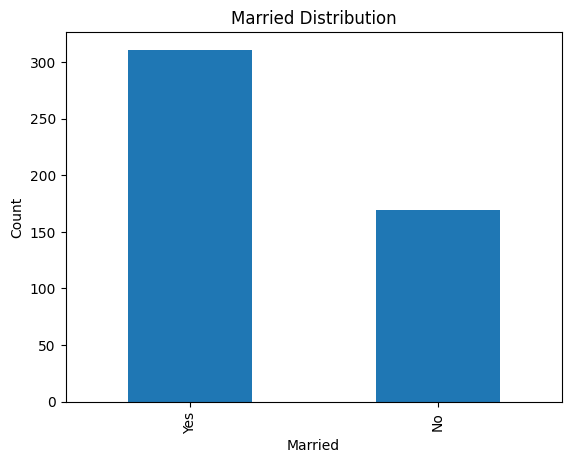

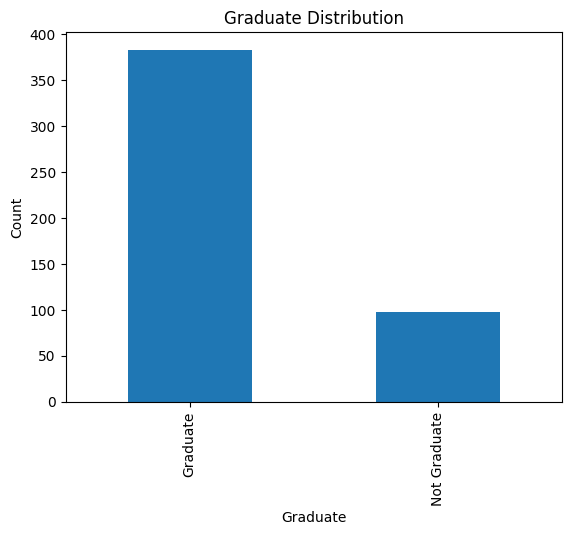

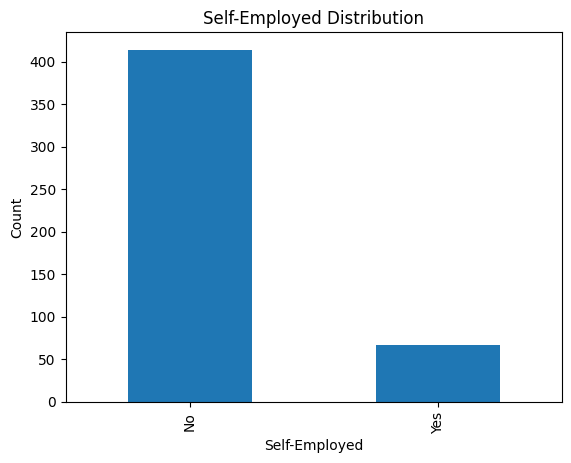

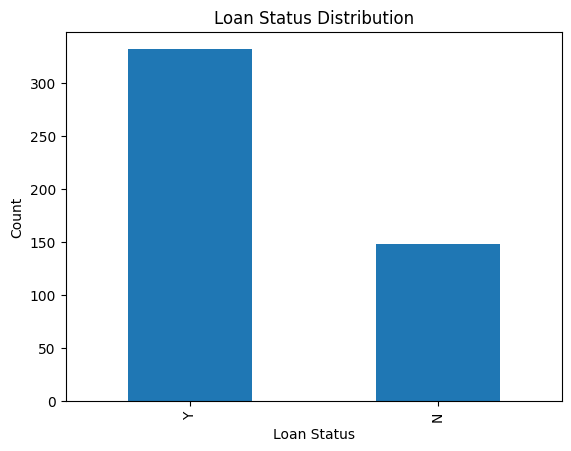

In [ ]:
#Count the values of the categorical variables
male, female = pd.value_counts(customer_dt['Gender'])
yes_married, no_married = pd.value_counts(customer_dt['Married'])
graduate, non_graduate = pd.value_counts(customer_dt['Education'])
non_selfemployed, yes_selfemployed = pd.value_counts(customer_dt['Self_Employed'])
yes_loan, no_loan = pd.value_counts(customer_dt['Loan_Status'])

#Plot Gender distribution values
GenderPlot  = customer_dt['Gender'].value_counts().plot(kind='bar',xlabel='Gender',ylabel='Count',title='Gender Distribution')
ax = GenderPlot
plt.show()

#Plot Married distribution values
MarriedPlot  = customer_dt['Married'].value_counts().plot(kind='bar',xlabel='Married',ylabel='Count',title='Married Distribution')
ax = MarriedPlot
plt.show()

#Plot Education distribution values
EducationPlot  = customer_dt['Education'].value_counts().plot(kind='bar',xlabel='Graduate',ylabel='Count',title='Graduate Distribution')
ax = EducationPlot
plt.show()

#Plot Self-Employed distribution values
SelfEmployedPlot  = customer_dt['Self_Employed'].value_counts().plot(kind='bar',xlabel='Self-Employed',ylabel='Count',title='Self-Employed Distribution')
ax = SelfEmployedPlot
plt.show()

#Plot LoanStatus distribution values
LoanStatusPlot  = customer_dt['Loan_Status'].value_counts().plot(kind='bar',xlabel='Loan Status',ylabel='Count',title='Loan Status Distribution')
ax = LoanStatusPlot
plt.show()

# Step 3-1: Training the model and performance evaluation: Segmentation of customers through K-means clustering

Once the dataset has been processed and we have a first understanding of the type and characteristics of the variables, we are ready to apply clustering methods to group.
Firstly, we will code our own Kmeans algorithm. We will select `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount` variables to fit the clusters.
Once the clustering is done, we need to understand the output. 2-dimension and 3-dimension scatter plot visualizations are excellent techniques to evaluate the clustering output.
To check if our Kmeans algorithm works properly, we will use the Sklearn’s Kmeans function to cluster the dataset. We will compare the 2D and 3D plots from the Sklearn clustering and ours.
Finally, as part of any Machine Learning Project, we need to calculate the perfomance of our model. For Kmeans, we will 1) estimate the optimal K value through the Elbow method and 2) calculate the sihouette score for several values of K


## Your own K-means function

[**EX13**] Build a `calculate_distance` function to calculate the distance between each point and the centroid

In [ ]:
#Solution
def calculate_distance (X, centroid):
    squareDistance=np.zeros((X.shape[0],centroid.shape[0]))

    ########
    for i in range(centroid.shape[0]):
        squareDistance[:, i] = np.sum((X - centroid[i])**2, axis=1)
    ########

    return squareDistance

[**EX14**] Build `K_means_clustering` function that creates a clustering according to K-means methodology.

In [ ]:
#Solution
def K_means_clustering(X, n_clusters=2, seed=1, num_iterations=10):
    # Initialitize centroids based on a random selection of #n_clusters samples of X
    rng = np.random.RandomState(seed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centroids = X[i]

    #Repeat the process during num_iterations or convergence achieved
    for num in range(0,num_iterations):

    #For each iteration, calculate the shortest distance of each point of X to centroids
    #Labels are based on the index in the centroids array

        ##################
        distances = calculate_distance(X,centroids)
        labels = np.argmin(distances, axis = 1)
        ##################



    #Calculate the new centroids based on the means of each point assigned to each cluster

        ##################
        new_centroids = []
        for c in range(n_clusters):
            cluster_points = X[labels == c]  # Select points belonging to cluster c
            centroid = np.mean(cluster_points, axis=0)  # Calculate the mean of the cluster points
            new_centroids.append(centroid)

        new_centroids = np.array(new_centroids)
        ##################



    # Evaluate convergence: if new_centroids=centroids, stop iterations
        if np.all(centroids == new_centroids):
            print('Convergence achieved with:',num, 'iterations')
            break
        else:
            if num%10 == 0 and num != 0:
                print('No convergence yet after', num, 'iterations')
        centroids = new_centroids

    return centroids, labels

Let's define the `training_dt` dataset based on the following variables: `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`.

In [ ]:
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]
training_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    480 non-null    int64  
 1   CoapplicantIncome  480 non-null    float64
 2   LoanAmount         480 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.0 KB


[**EX15**]Apply log transformation (np.log()) to `ApplicantIncome`and `LoanAmount`variables and standarize (StandardScaler()) all 3 variables (i.e. `ApplicantIncome`,`LoanAmount` and `CoapplicantIncome`) and store all these transformations to a new `training_dt` that will be the dataframe to use in all Clustering exercises. Execute your `K_means_clustering` function to this new `training_dt` and number of clusters=3. Calculate the centroids of each cluster.

In [ ]:
#Apply log transformation to ApplicantIncome and LoanAmount
training_dt['ApplicantIncome'] = np.log(training_dt['ApplicantIncome'])
training_dt['LoanAmount'] = np.log(training_dt['LoanAmount'])

#Apply StandardScaler to ApplicantIncome, LoanAmount and CoapplicantIncome
scaler = StandardScaler()
scaled_training_dt = scaler.fit_transform(training_dt)
training_dt = pd.DataFrame(scaled_training_dt, index=training_dt.index, columns=training_dt.columns)

# Convert training_dt to a numpy array
X = training_dt[['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']].values

# Perform K-means clustering on X
centroids, labels = K_means_clustering(X, n_clusters=3, seed=1, num_iterations=10)


<ipython-input-25-6af85dcfac93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_dt['ApplicantIncome'] = np.log(training_dt['ApplicantIncome'])
<ipython-input-25-6af85dcfac93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_dt['LoanAmount'] = np.log(training_dt['LoanAmount'])


Now, it's time to understand how the clustering process works! To do it, we are plotting the `training_dt` painting the colour based on `Cluster_id`, output from the k-means.

 [**EX16**] Plot the following scatter plots representing the centroids:
 - Between `ApplicantIncome` vs `CoapplicantIncome`
 - Between `ApplicantIncome`vs `LoanAmount` and
 - Between `CoapplicantIncome`vs `LoanAmount`


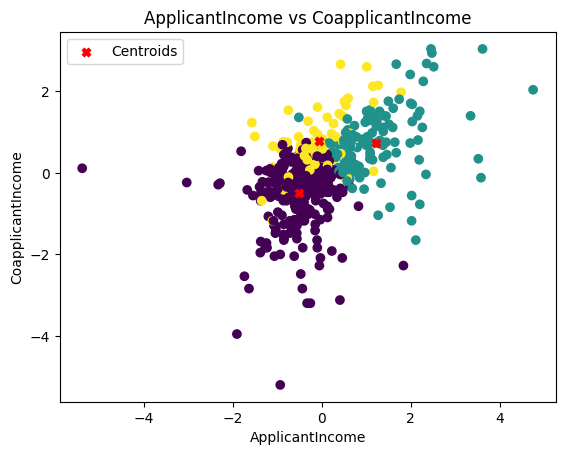

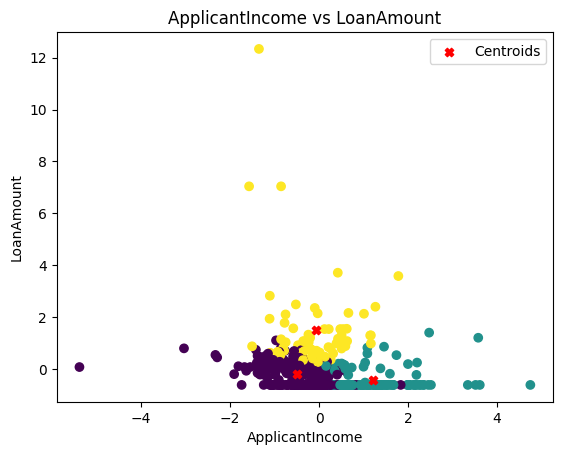

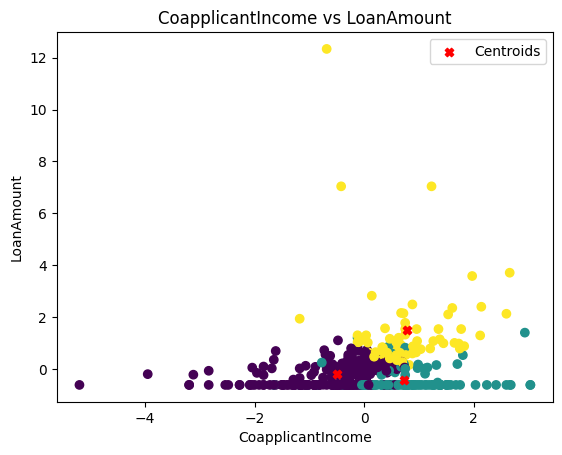

In [ ]:
# Plotting the scatter plot: ApplicantIncome vs CoapplicantIncome
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', label='Centroids')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.legend()
plt.title('ApplicantIncome vs CoapplicantIncome')
plt.show()

# Plotting the scatter plot: ApplicantIncome vs LoanAmount
plt.scatter(X[:, 0], X[:, 2], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', marker='X', label='Centroids')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.legend()
plt.title('ApplicantIncome vs LoanAmount')
plt.show()

# Plotting the scatter plot: CoapplicantIncome vs LoanAmount
plt.scatter(X[:, 1], X[:, 2], c=labels)
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', marker='X', label='Centroids')
plt.xlabel('CoapplicantIncome')
plt.ylabel('LoanAmount')
plt.title('CoapplicantIncome vs LoanAmount')
plt.legend()
plt.show()


**[EX17]** According to these scatter plots, would you change the value of K? Which one and why?

**Sí. Puesto que con K=3 clusters, los centroides se encuentran muy próximos unos de otros mezclándose entre ellos. En cambio si seleccionamos K=2 el dataset será separable de manera visible. **

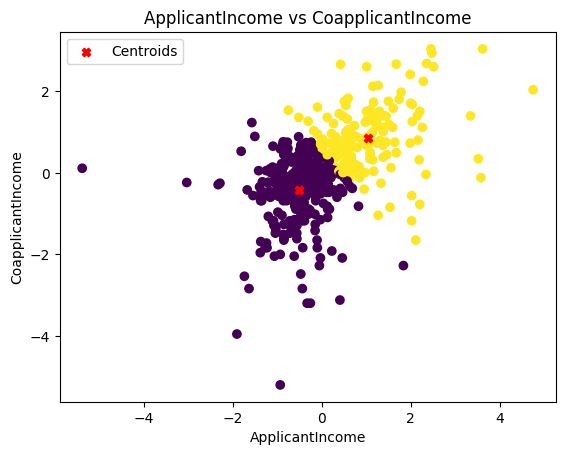

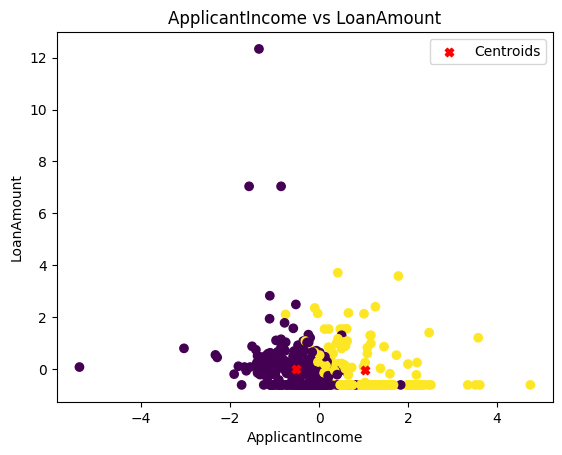

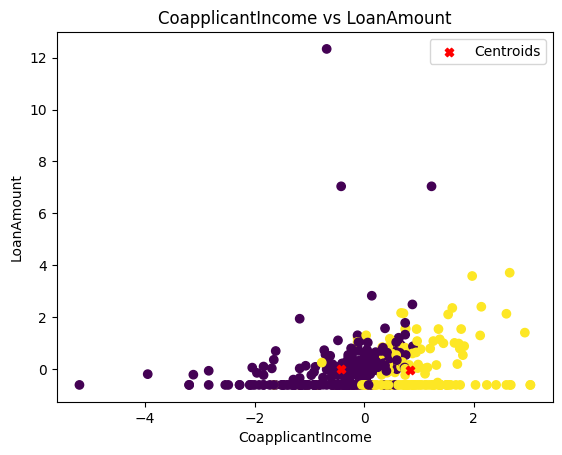

In [ ]:
#Comprobamos dicha hipótesis a través del ejercicio anterior pero con K=2
centroids, labels = K_means_clustering(X, n_clusters=2, seed=1, num_iterations=10)

# Plotting the scatter plot: ApplicantIncome vs CoapplicantIncome
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', label='Centroids')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.legend()
plt.title('ApplicantIncome vs CoapplicantIncome')
plt.show()

# Plotting the scatter plot: ApplicantIncome vs LoanAmount
plt.scatter(X[:, 0], X[:, 2], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', marker='X', label='Centroids')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.legend()
plt.title('ApplicantIncome vs LoanAmount')
plt.show()

# Plotting the scatter plot: CoapplicantIncome vs LoanAmount
plt.scatter(X[:, 1], X[:, 2], c=labels)
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', marker='X', label='Centroids')
plt.xlabel('CoapplicantIncome')
plt.ylabel('LoanAmount')
plt.title('CoapplicantIncome vs LoanAmount')
plt.legend()
plt.show()

[**EX18**] Execute the Sklearn library's KMeans function and compare both `ApplicantIncome`vs `LoanAmount`scatter plots. Are they similar?

Tip: We recommend the following  [KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) parameters: `init`='random', `n_init`=10, `tol`=1e-04 and `random_state`=0

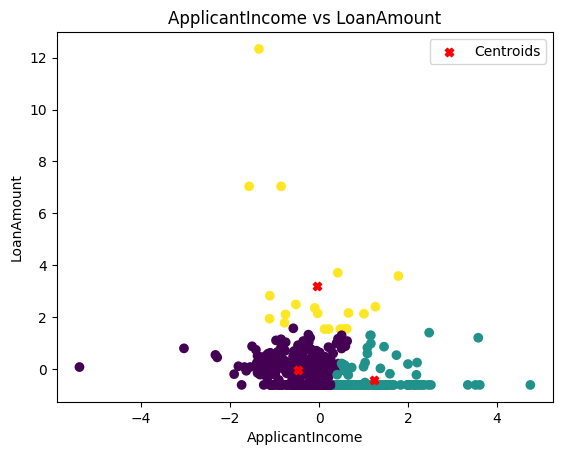

In [ ]:
kmeans = KMeans(n_clusters=3,init='random', n_init=10, tol=1e-04, random_state=0)

#fit
kmeans.fit(X[:,[0,2]])

sk_labels = kmeans.labels_
sk_centroids = kmeans.cluster_centers_
# Plotting the scatter plot: ApplicantIncome vs LoanAmount
plt.scatter(X[:, 0], X[:, 2], c=sk_labels)
plt.scatter(sk_centroids[:, 0], sk_centroids[:, 1], c='red', marker='X', label='Centroids')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.legend()
plt.title('ApplicantIncome vs LoanAmount')
plt.show()


**Observamos como el scatter plot ejecutados con las distintas funciones son similares.**

## Measuring the quality of the clustering and the optimal K: Elbow method and sihouette

The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a high dimensional dataset that cannot be visualized.

The elbow method is a useful graphical tool to estimate the optimal number of clusters. Intuitively, we can say that, if k increases, the distorsion within each cluster will decrease because the samples will be closer to their centroids. However, sometimes is not efficient to increase the **K** value because the distorsion doesn't decrease enough in comparision with the computation load required for higher **K**.

**[EX 19]** Let's calculate the Elbow method for the previous dataset, i.e. containing only `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount` variables for K values from 1 to 10.
We use [km.inertia_](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from the Sklearn library's KMeans to measure the sum of squared distances of samples to their closest cluster center. Which is the optimal value for K?

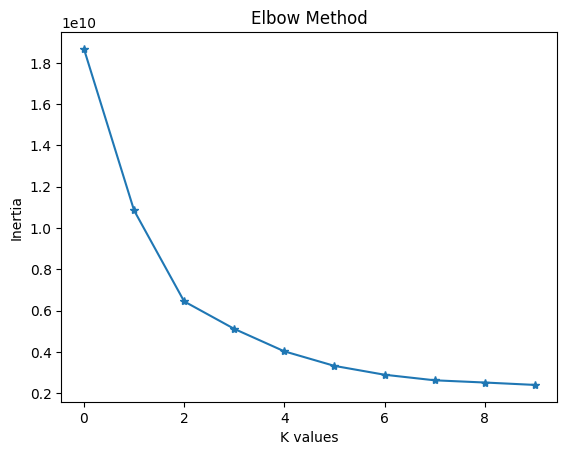

In [ ]:

# Selection of the dataset
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]
inertia = []
#Calculate the Kmeans from K=1 to 10
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=10,
        tol=1e-04, random_state=0
    )
    km.fit(training_dt)
    inertia.append(km.inertia_)



# plot inertia

##################
plt.plot(inertia, marker='*')
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
##################

**El valor óptimo para K en el algoritmo de K-means se determina generalmente identificando el "punto de codo" en el gráfico de los valores de inercia. Éste representa una disminución significativa en la inercia a medida que aumenta el número de grupos, en este caso, el valor óptimo se encontraría en K=2.**

**Silhouette** is a metric to measure the *quality* of the clustering process. Clustering models with a high **Silhouette** are said to be dense, i.e. samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other. This measure has a range of [-1, 1].

[**EX20**]Calculate the `silhouette_score`value for a range of KMeans clusters from 2 to 7. The dataset to use is `training_dt`with the following variables: `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`. Which is the value of **K** with better **Silhouette**? Does it make sense taking into consideration the previous scatter plots?

Tip: use [silhouette_score](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) to calculate the silhouette score and further information.

In [ ]:
#Solution
# Selection of the dataset
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]
for j in range(2, 8):

    ##################
    #Calculate the Kmeans from K=2 to 7
    km = KMeans(
        n_clusters=j, init='random',
        n_init=10, max_iter=10,
        tol=1e-04, random_state=0
    )
    cluster_labels = km.fit_predict(training_dt)
    ##################

    silhouette_avg = silhouette_score(training_dt, cluster_labels)
    print("For n_clusters =", j,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.7632030138633864
For n_clusters = 3 The average silhouette_score is : 0.6003700002173825
For n_clusters = 4 The average silhouette_score is : 0.6029875006802606
For n_clusters = 5 The average silhouette_score is : 0.3829710093085035
For n_clusters = 6 The average silhouette_score is : 0.37787863939624106
For n_clusters = 7 The average silhouette_score is : 0.423208641170652


**El valor de k con mejor silhouette es k=2, lo que concuerda tanto con la hipótesis del ex17 como con la prueba del ejercico anterior a través de la inertia**

For a visual understanding about each cluster, we can plot the silhouette score for each sample of the dataset. Execute the following code:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

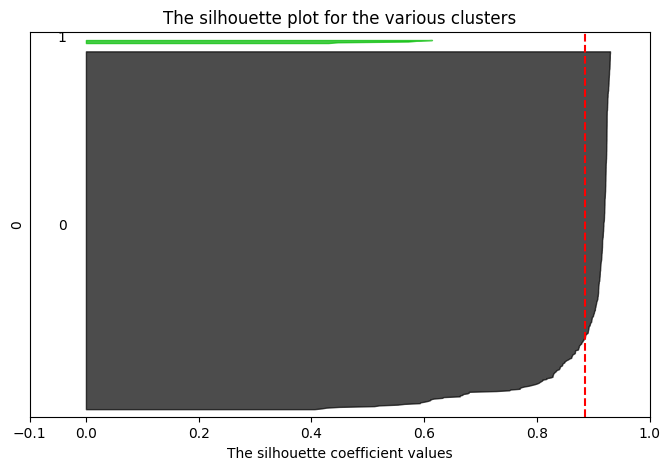

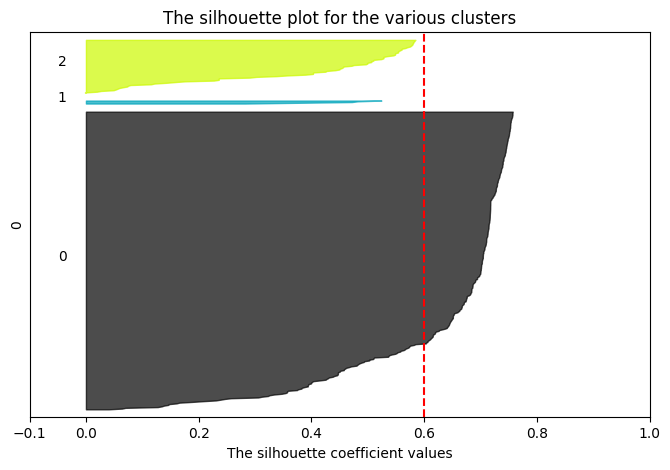

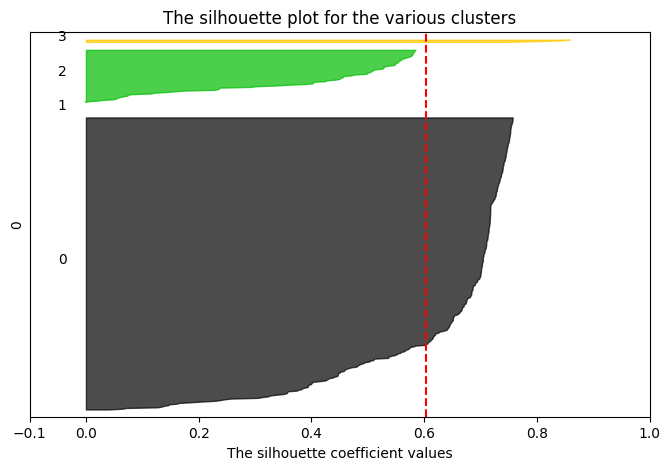

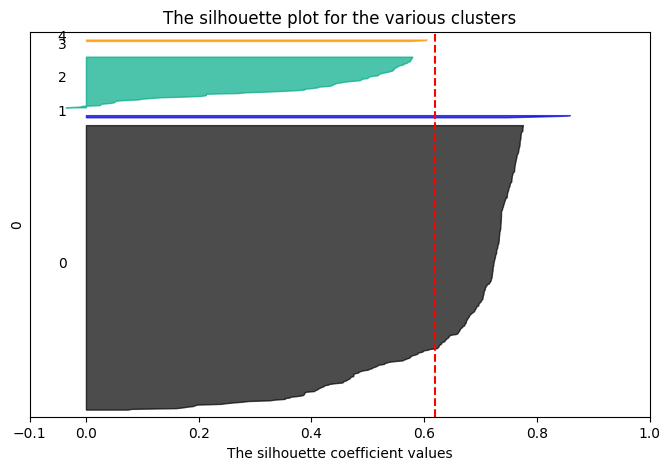

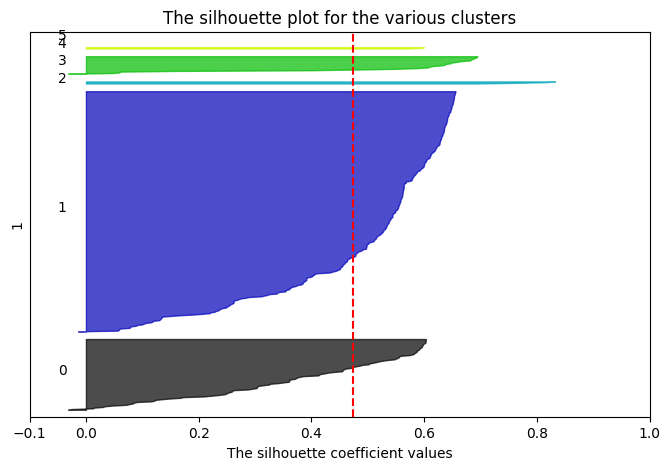

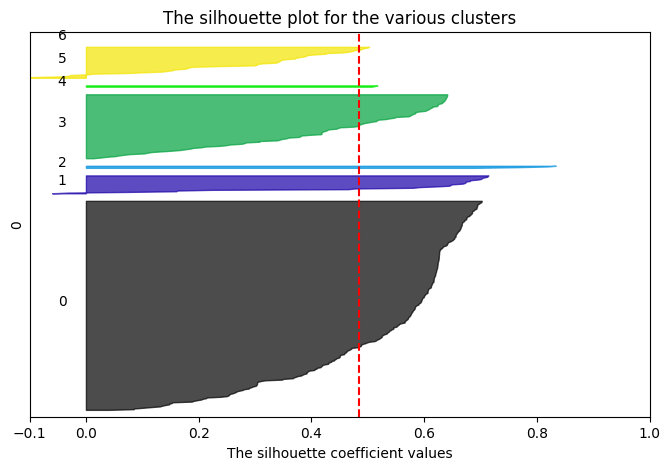

In [ ]:
# Selection of the dataset
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]
for j in range(2, 8):
    n_clusters=j
    km  = KMeans(j, random_state=10)
    cluster_labels = km.fit_predict(training_dt)
    silhouette_avg = silhouette_score(training_dt, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(training_dt, cluster_labels)
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(training_dt) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(j):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

# Step 4: Insights generation: Understanding the clustering output

Let's consider that **K=2** is good enough to cluster our customer base and generate insights for the Bank company.

[**EX21**]Repeat the K-Means clustering with **K=2** for the `training_dt`formed by `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`. Later, apply the inverse of standardscaler to all 3 variables and finally apply the inverse of np.log (i.e. np.exp) to `ApplicantIncome` and `LoanAmount` variables. For each cluster, calculate the **mean**, **standard deviation**, **min**, **max** for each variable.


In [ ]:
#Previous transformation of ex15
# Selection of the dataset
training_dt=customer_dt[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]

#Apply log transformation to ApplicantIncome and LoanAmount
training_dt['ApplicantIncome'] = np.log(training_dt['ApplicantIncome'])
training_dt['LoanAmount'] = np.log(training_dt['LoanAmount'])

#Apply StandardScaler to ApplicantIncome, LoanAmount and CoapplicantIncome
scaler = StandardScaler()
scaled_training_dt = scaler.fit_transform(training_dt)
training_dt = pd.DataFrame(scaled_training_dt, index=training_dt.index, columns=training_dt.columns)

<ipython-input-32-108ef85149bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_dt['ApplicantIncome'] = np.log(training_dt['ApplicantIncome'])
<ipython-input-32-108ef85149bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_dt['LoanAmount'] = np.log(training_dt['LoanAmount'])


In [ ]:
#Calculate the k-means
k = 2
km = KMeans(n_clusters=2, init='random',
        n_init=10, max_iter=10,
        tol=1e-04, random_state=0)
cluster_labels = km.fit_predict(training_dt)

#Apply inverse of StandardScaler to ApplicantIncome, LoanAmount and CoapplicantIncome
scaler = StandardScaler()
scaled_training_dt = scaler.fit_transform(training_dt)
inverse_scaled_training_dt = scaler.inverse_transform(scaled_training_dt)
training_dt = pd.DataFrame(inverse_scaled_training_dt, index=training_dt.index, columns=training_dt.columns)

#Apply inverse log transformation to ApplicantIncome and LoanAmount
training_dt[['ApplicantIncome', 'LoanAmount']] = np.exp(training_dt[['ApplicantIncome', 'LoanAmount']])

#Add cluster labels to training_dt
training_dt = np.column_stack((training_dt, cluster_labels))

# Calculate statistics for each variable within each cluster
variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
clusters = np.unique(cluster_labels)

for cluster in clusters:
    print("\nCluster:", cluster)
    cluster_data = training_dt[training_dt[:, -1] == cluster]
    for variable in variables:
        print("\nVariable:", variable)
        variable_data = cluster_data[:, variables.index(variable)]

        max_values = np.max(variable_data)
        print("Maximum:", max_values)
        min_values = np.min(variable_data)
        print("Minimum:", min_values)
        mean_values = np.mean(variable_data)
        print("Mean:", mean_values)
        std_values = np.std(variable_data)
        print("Standard Deviation:", std_values)


Cluster: 0

Variable: ApplicantIncome
Maximum: 115.1024490475204
Minimum: 0.5971447569512651
Mean: 4.984353118834634
Standard Deviation: 10.643176537000272

Variable: CoapplicantIncome
Maximum: 3.716650061019002
Minimum: -0.6046330020004204
Mean: -0.055374773114327557
Standard Deviation: 0.8799759912090923

Variable: LoanAmount
Maximum: 20.856497458725094
Minimum: 0.19211101393198413
Mean: 3.4318343433689136
Standard Deviation: 3.656104494377799

Cluster: 1

Variable: ApplicantIncome
Maximum: 6.252452530652361
Minimum: 0.004599568069656215
Mean: 0.7238987859859547
Standard Deviation: 0.4884835488125979

Variable: CoapplicantIncome
Maximum: 12.335124077945437
Minimum: -0.6046330020004204
Mean: 0.024685139822049663
Standard Deviation: 1.048146564690995

Variable: LoanAmount
Maximum: 4.644392579405385
Minimum: 0.005514763493514393
Mean: 0.8574202092793793
Standard Deviation: 0.5411423231207322


**[EX22]** Describe with one sentence the main characteristic of every customer segment in terms of this 3 variables?


**Los clientes del cluster 0 poseen valores promedios más altos, mayor variabilidad y valores máximos más grandes para estas variables.**

**Los clientes del cluster 1 poseen valores promedios más bajos, menor variabilidad y valores máximos más pequeños para estas variables.**

# Step 3-2: Training the model and performance evaluation: Segmentation of customers through Mixture of Gaussian clustering

As we know, there are other mechanisms to cluster a dataset. Let's test how Mixture of Gaussians function from sklearn library works.

[**EX23**] Execute the Mixture of Gaussians function (with number of components=3) to `training_dt` dataset with `ApplicantIncome`, `CoapplicantIncome`and `LoanAmount` variables.
- Which is the size of each cluster?
- Visualize the scatter plot between `ApplicantIncome` vs `LoanAmount`. Is it similar to the resulting from K-Means and K=3?
- Visualize the scatter plot between `ApplicantIncome` vs `CoapplicantIncome`. Is it similar to the resulting from K-Means and K=3?
- Visualize the scatter plot between `CoapplicantIncome` vs `LoanAmount`. Is it similar to the resulting from K-Means and K=3?

Tip: You may use [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) from Sklearn libray.

Cluster Sizes: [475   1   4]

**Scatter Plots**



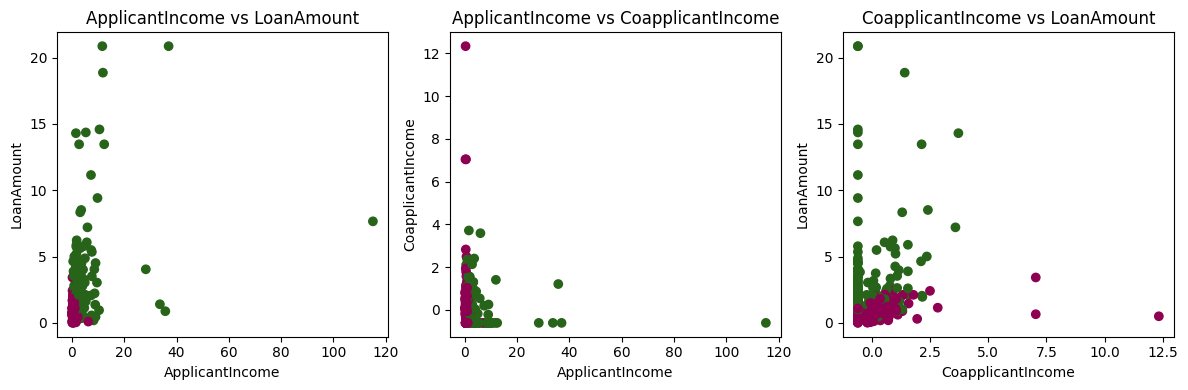

In [ ]:
data = pd.DataFrame(training_dt)
X = data.values
# Define the Gaussian Mixture model
gm = GaussianMixture(n_components=3, random_state=0)

# Fit the model to the training_dt dataset
gm.fit(X)

# Predict the cluster labels for each sample
cluster_labels = gm.predict(X)

# Count the number of data points in each cluster
cluster_sizes = np.bincount(cluster_labels)

# Print cluster sizes
print("Cluster Sizes:", cluster_sizes)

# Visualize scatter plots
print("\n**Scatter Plots**\n")
plt.figure(figsize=(12, 4))

# Scatter plot: ApplicantIncome vs LoanAmount
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 2], c=labels, cmap='PiYG')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('ApplicantIncome vs LoanAmount')

# Scatter plot: ApplicantIncome vs CoapplicantIncome
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='PiYG')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.title('ApplicantIncome vs CoapplicantIncome')

# Scatter plot: CoapplicantIncome vs LoanAmount
plt.subplot(133)
plt.scatter(X[:, 1], X[:, 2], c=labels, cmap='PiYG')
plt.xlabel('CoapplicantIncome')
plt.ylabel('LoanAmount')
plt.title('CoapplicantIncome vs LoanAmount')

plt.tight_layout()
plt.show()

[**EX24**] Evaluate the **Silhouette** metric for MoG with **number of components** from 2 to 7.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

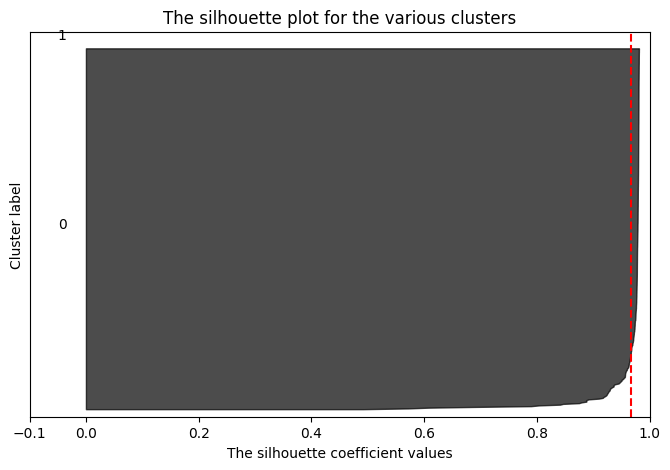

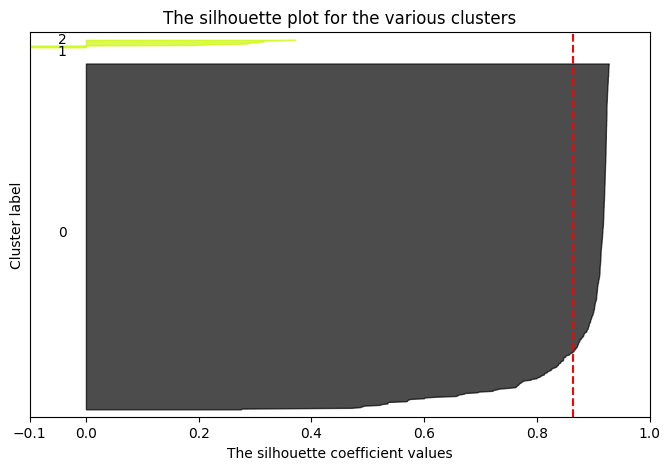

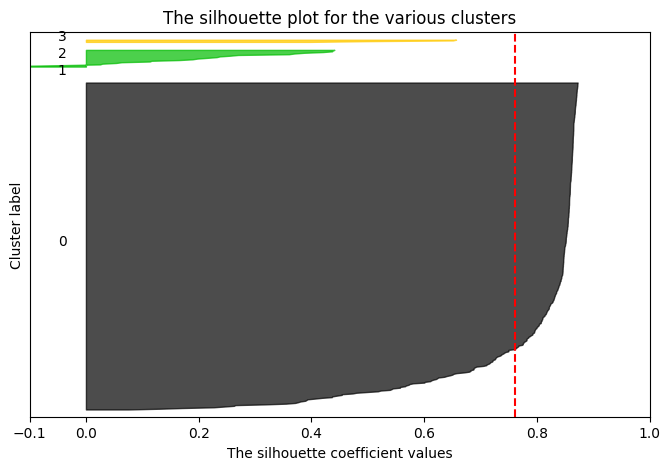

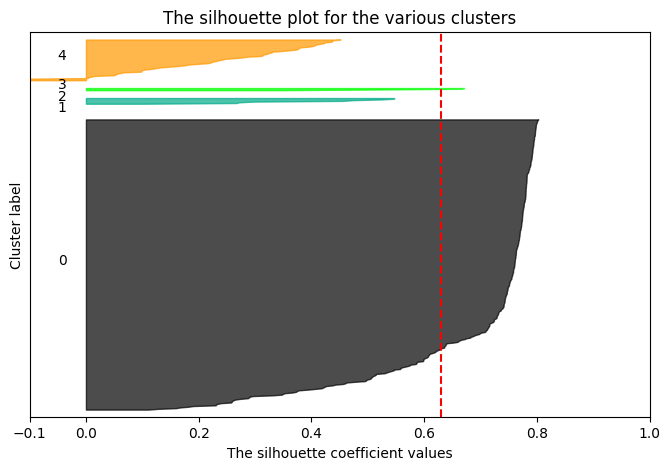

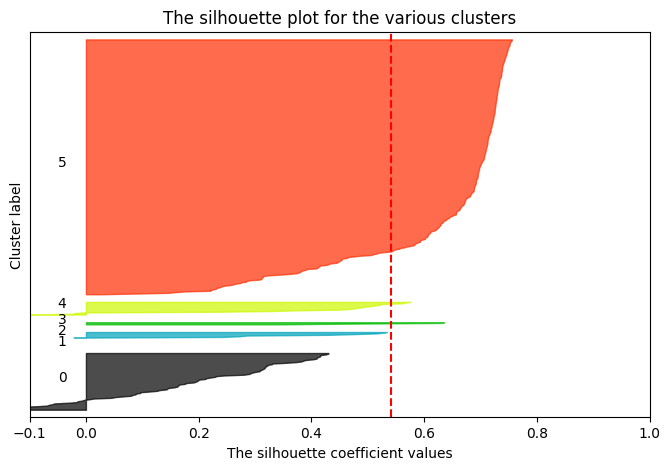

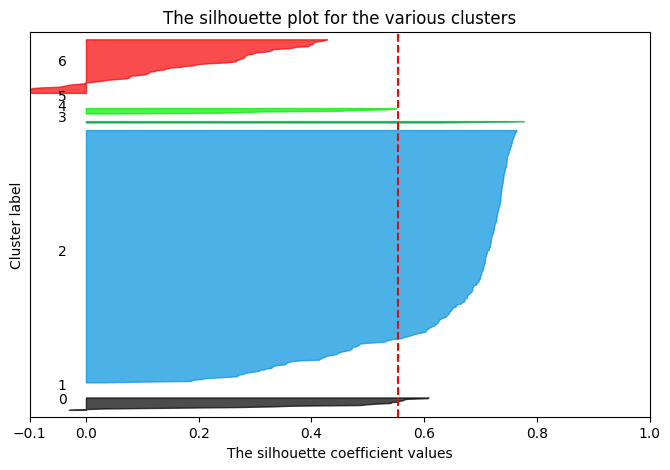

In [ ]:
for j in range(2, 8):
    n_clusters=j
    km  = KMeans(j, random_state=10)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(j):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

**[EX25]** Which is the number of cluster with the highest score? Which method is finally the best for our dataset?



In [ ]:
# Define the range of numbers of clusters to evaluate
num_clusters = range(2,8)

# Find the number of clusters with the highest scores
max_silhouette_cluster = num_clusters[np.argmax(silhouette_avg)]
max_silhouette_cluster

2

**El número de clusters con mayor score es k=2.**



# Step 3-3: Training the model and performance evaluation: Classification of customers to be granted a loan

 Until now, the credit risk department of our Bank defined and applied the criteria to approve or deny a loan. However, this criteria is differently applied between their members that belong to the risk department. To solve this situation and to have and apply a common criteria, our Customer Intelligence area has been requested to design and implement an algorithm to classify between loan request to be accepted or denied.

**[EX26]** Convert categorical columns to numerical using one-hot encoding and drop `Loan_ID`column. You should obtain something similar to:


In [ ]:
# Drop the Loan_ID column
customer_dt_encoded =customer_dt.drop('Loan_ID', axis=1)

# Perform one-hot encoding on categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
customer_dt_encoded = pd.get_dummies(customer_dt_encoded, columns=categorical_columns)

# Map 'N' and 'Y' to 0 and 1 in Loan_Status column
customer_dt_encoded['Loan_Status'] = customer_dt_encoded['Loan_Status'].map({'N': 0, 'Y': 1})

# Print customer_encoded_dt
customer_dt_encoded.head()

,Index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,2,3000,0.0,66.0,360.0,1.0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,4,6000,0.0,141.0,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
5,5,5417,4196.0,267.0,360.0,1.0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [ ]:
customer_dt_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    480 non-null    int64  
 1   ApplicantIncome          480 non-null    int64  
 2   CoapplicantIncome        480 non-null    float64
 3   LoanAmount               480 non-null    float64
 4   Loan_Amount_Term         480 non-null    float64
 5   Credit_History           480 non-null    float64
 6   Loan_Status              480 non-null    int64  
 7   Gender_Female            480 non-null    uint8  
 8   Gender_Male              480 non-null    uint8  
 9   Married_No               480 non-null    uint8  
 10  Married_Yes              480 non-null    uint8  
 11  Dependents_0             480 non-null    uint8  
 12  Dependents_1             480 non-null    uint8  
 13  Dependents_2             480 non-null    uint8  
 14  Dependents_3+            4

**[EX27]** Split the data into: a) into features (X) and target(i.e. `Loan_Status`) (y) and b) training (80% of total dataset) and test sets (20% of total dataset)

In [ ]:
# Splitting into features (X) and target (y)
X = customer_dt_encoded.drop('Loan_Status',axis=1)
y = customer_dt_encoded['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

### 3.3.1 Baseline of models: Training and evaluation

[**EX28**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Visualize the Decision Tree using tree.export_graphviz.
- Train a second Decision Tree with the following hyperparameters: `max_depth`=5, `min_samples_split`=5, `min_samples_leaf`=5, `random_state`=42. Calculate **precision**, **recall**, **accuracy** and the **confusion matrix**. Has the performance improved?

**First Classifier**

Precision score: 0.7619047619047619
Recall score: 0.7868852459016393
Accuracy score: 0.7083333333333334

Confusion Matrix:
[[20 15]
 [13 48]] 



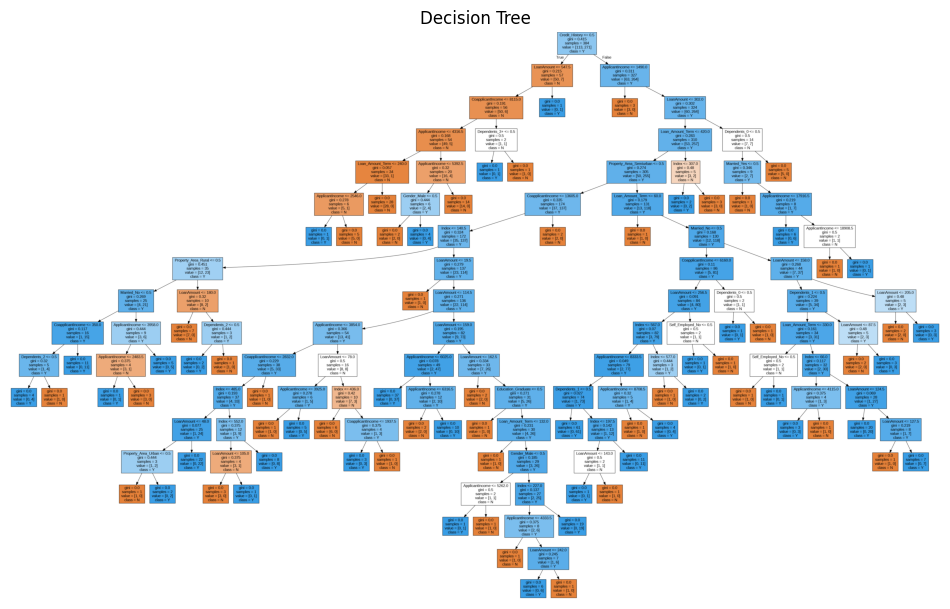


**Second Classifier**

Precision score: 0.7142857142857143
Recall score: 0.9016393442622951
Accuracy score: 0.7083333333333334

Confusion Matrix:
[[13 22]
 [ 6 55]] 



In [ ]:
import graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print('**First Classifier**\n')
# Train the DTC on the training data
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, pos_label=1)
print("Precision score:", precision)

recall = recall_score(y_test, y_pred, pos_label=1)
print("Recall score:", recall)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion,'\n')

#Visualize Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['N','Y'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")

# Load the image
image_path = '../Project_students/decision_tree_graphivz.png'
image = mpimg.imread(image_path)

# Display the image
fig = plt.figure(figsize=(12,12))
plt.imshow(image)
plt.title('Decision Tree')
plt.axis('off')
plt.show()

print('\n**Second Classifier**')
#Train a second Decision Tree
clf2 = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5, random_state=42)
clf2.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = clf2.predict(X_test)

# Calculate precision, recall, and accuracy
precision2 = precision_score(y_test, y_pred2, pos_label=1)
print("\nPrecision score:", precision2)

recall2 = recall_score(y_test, y_pred2, pos_label=1)
print("Recall score:", recall2)

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy score:", accuracy2)

# Calculate confusion matrix
confusion2 = confusion_matrix(y_test, y_pred2)
print("\nConfusion Matrix:")
print(confusion2,'\n')

**En clf2 respecto clf1 se observa que el cambio en los hiperparámetros de un afecta el puntaje de precisión y recall pero no el puntaje de exactitud, significa que el modelo está haciendo mejoras en la clasificación de una clase específica (ya sea la clase positiva o la clase negativa), pero sin afectar significativamente la clasificación correcta en general.**

[**EX29**] Train the Logistic Regression algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Logistic Regression algorithm working better than DT? Why?

In [ ]:
# Train the DTC on the training data
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, pos_label=1)
print("Precision score:", precision)

recall = recall_score(y_test, y_pred, pos_label=1)
print("Recall score:", recall)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion,'\n')

Precision score: 0.7108433734939759
Recall score: 0.9672131147540983
Accuracy score: 0.7291666666666666

Confusion Matrix:
[[11 24]
 [ 2 59]] 



**Observamos como el rendimiento con un clasificador Logistic Regression es mejor respecto al de un Decision Tree pues en este caso, el dataset presenta relaciones lineales entre las características y la variable objetivo**

[**EX30**] Scale the numerical columns using StandardScaler function. Train again the Logistic Regression algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Logistic Regression algorithm working better than the previous LR? Why?

In [ ]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# Train the DTC on the training data
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, pos_label=1)
print("Precision score:", precision)

recall = recall_score(y_test, y_pred, pos_label=1)
print("Recall score:", recall)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion,'\n')

Precision score: 0.7261904761904762
Recall score: 1.0
Accuracy score: 0.7604166666666666

Confusion Matrix:
[[12 23]
 [ 0 61]] 



**El rendimiento en datos escalados es mejor respecto al anterior debido a una mejor convergencia debida a la preservación de relaciones y la eliminación de sesgo de escala.**

### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX31**] Train a Decision Tree and Logistic Regression algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

Tip 2: You may use [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to evaluate

Model LR with accuracy (mean): 0.8041666666666666 and accuracy (std): 0.02585348676248097
Model Decision_trees with accuracy (mean): 0.7270833333333334 and accuracy (std): 0.02825970826302194


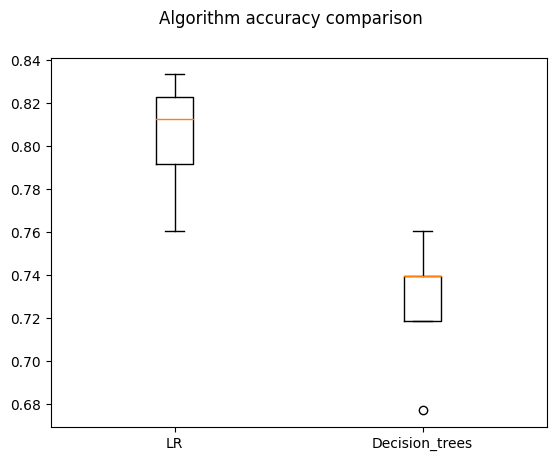

In [ ]:
#Models definition
models=[]
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('Decision_trees', DecisionTreeClassifier()))

#Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
for name_model, model in models:
#Solution
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(), "and accuracy (std):", cv_results.std())


#boxplot for algorithm comparison
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**El modelo con mejor media es el LR al igual que el modelo con menor desviación, el cual también es el LR.**

### 3.3.2 Improving the model using ensembling models: voting, bagging and boosting

The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX32**] Build a **voting** ensemble formed by a Logistic Regression and Decision Tree. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [ ]:
# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=1000)
estimators.append(('LR', model1))
model2 = DecisionTreeClassifier()
estimators.append(('DecisionTree', model2))

# create the ensemble model
#Solution
ensemble = VotingClassifier(estimators)

#Train the ensemble model
ensemble.fit(X_train,y_train)

#Make predictions
y_pred_ensemble=ensemble.predict(X_test)

print("*********************************** VOTING ENSEMBLE*****************************************")
result_ensemble=ensemble.score(X_test, y_test)
print("Accuracy:", result_ensemble)
matrix_ensemble=confusion_matrix(y_test, y_pred_ensemble)
print("Confusion matrix:\n", matrix_ensemble)
report_ensemble=classification_report(y_test, y_pred_ensemble)
print(report_ensemble)

*********************************** VOTING ENSEMBLE*****************************************
Accuracy: 0.6666666666666666
Confusion matrix:
 [[19 16]
 [16 45]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        35
           1       0.74      0.74      0.74        61

    accuracy                           0.67        96
   macro avg       0.64      0.64      0.64        96
weighted avg       0.67      0.67      0.67        96



**En este caso, dicho clasificador no tiene un mejor rendimiento que los anteriores pues sus valores de Precision, recall y accuracy son menores.**

### Bagging ensemble: Random Forest

[**EX33**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

It is also important to evaluate the probabilities distribution of the prediction. Execute this code to plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1.

Precision score: 0.75
Recall score: 0.9836065573770492
Accuracy score: 0.78125
Confusion Matrix:
 [[15 20]
 [ 1 60]]


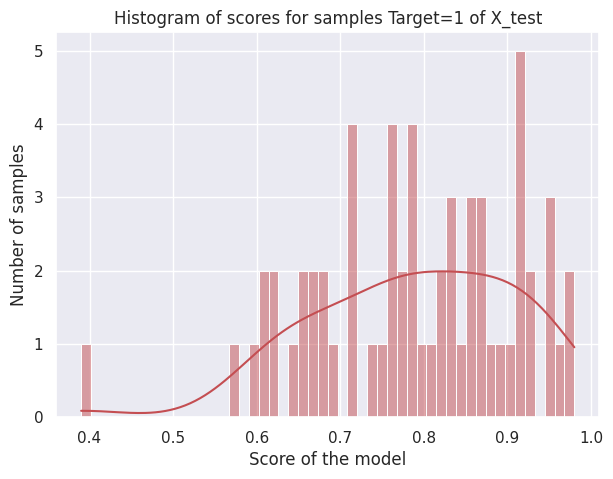

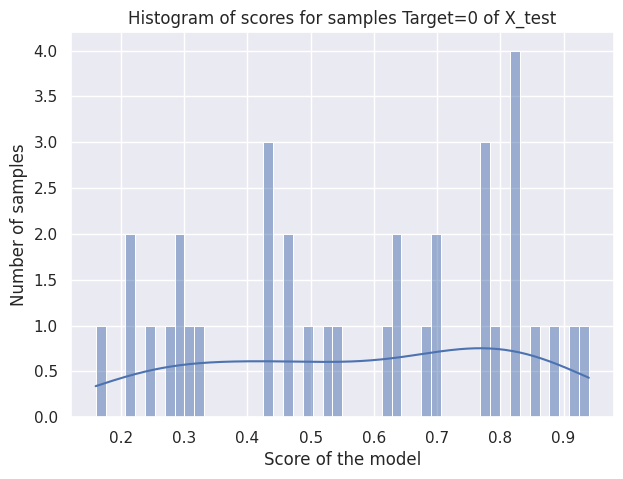

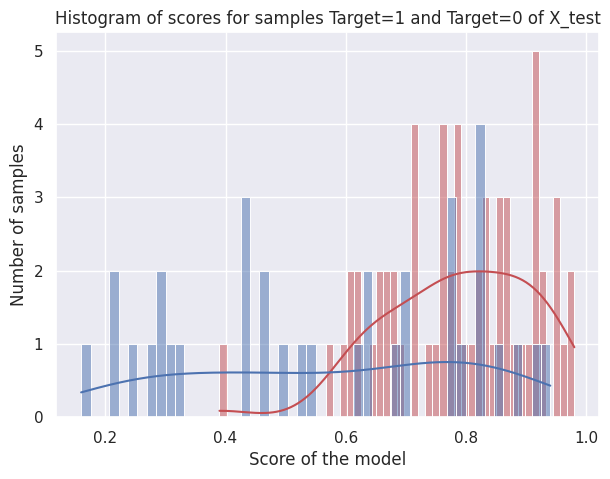

In [ ]:
# Train the Random Forest model
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_predRF = model_RF.predict(X_test)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_predRF,pos_label=1)
print("Precision score:", precision)

recall = recall_score(y_test, y_predRF,pos_label=1)
print("Recall score:", recall)

accuracy = accuracy_score(y_test, y_predRF)
print("Accuracy score:", accuracy)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_predRF)
print("Confusion Matrix:\n",confusion)

y_pred_proba_RF=model_RF.predict_proba(X_test)

y_pred_total_RF=np.concatenate((y_pred_proba_RF[:,1].reshape(-1,1),np.asarray(y_test).reshape(-1,1)), axis=1)
y_test_1_RF=y_pred_total_RF[y_pred_total_RF[:,1]==1]    #Y=1
y_test_0_RF=y_pred_total_RF[y_pred_total_RF[:,1]==0]    #N=0

sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(y_test_1_RF[:,0],kde=True, bins=50, color="r")
plt.title('Histogram of scores for samples Target=1 of X_test')
plt.xlabel('Score of the model')
plt.ylabel('Number of samples')
plt.show()

sns.histplot(y_test_0_RF[:,0],kde=True, bins=50, color="b")
plt.title('Histogram of scores for samples Target=0 of X_test')
plt.xlabel('Score of the model')
plt.ylabel('Number of samples')
plt.show()

sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(y_test_1_RF[:,0],kde=True, bins=50, color="r")
plt.title('Histogram of scores for samples Target=1 and Target=0 of X_test')
sns.histplot(y_test_0_RF[:,0],kde=True, bins=50, color="b")
plt.xlabel('Score of the model')
plt.ylabel('Number of samples')
plt.show()

**En este caso el clasificador Random Forest sí es mejor que otros utilizado, esto lo podemos observar pues los datos de Recall, Precision y Accuracy son mayores respecto a otros clasificadores. Ésto es debido a que RF otorga una mayor precisión y capacidad para manejar características no lineales.**

**[EX34]** As the dataset has more samples for class "Y" than for class "N", the training process might be affected by the unbalanced scenario. Random Forest's `class_weight`="balanced" will fix it. Train a new RF model including `class_weight`="balanced". Has the RF's performance improved? Is the unbalanced class affecting the performace?

In [ ]:
# Train the Random Forest with class_weight="balanced"
model_RF = RandomForestClassifier(class_weight="balanced")
model_RF.fit(X_train, y_train)

# Make predictions on the test data
y_predRF = model_RF.predict(X_test)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_predRF,pos_label=1)
print("Precision score:", precision)

recall = recall_score(y_test, y_predRF,pos_label=1)
print("Recall score:", recall)

accuracy = accuracy_score(y_test, y_predRF)
print("Accuracy score:", accuracy)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_predRF)
print("Confusion Matrix:\n",confusion)


Precision score: 0.7228915662650602
Recall score: 0.9836065573770492
Accuracy score: 0.75
Confusion Matrix:
 [[12 23]
 [ 1 60]]


**Sí. Observamos como el rendimiento aumenta en una medida pequeña por lo que la clase no balanceada sí afecta y por ende, se debe de tener en cuenta.**

### Boosting ensemble: Gradient Tree Boosting

[**EX35**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.

In [ ]:
# Train the Gradient Tree Boosting (GBT).
model_GBT = GradientBoostingClassifier()
model_GBT.fit(X_train, y_train)

# Make predictions on the test data
y_predGBT = model_GBT.predict(X_test)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_predGBT,pos_label=1)
print("Precision score:", precision)

recall = recall_score(y_test, y_predGBT,pos_label=1)
print("Recall score:", recall)

accuracy = accuracy_score(y_test, y_predGBT)
print("Accuracy score:", accuracy)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_predGBT)
print("Confusion Matrix:\n",confusion)

Precision score: 0.7183098591549296
Recall score: 0.8360655737704918
Accuracy score: 0.6875
Confusion Matrix:
 [[15 20]
 [10 51]]


**Observamos como GBT no presenta un mejor rendimiento respecto a otros baseline models. Ésto puede ser debido a que la interpretabilidad de las características de nuestro dataset es sencillo por lo que resulta contraproducente un clasificador secuencial complejo como es el GBT**